In [1]:
import pandas as pd # import pandas under alias
import numpy as np # import numpy under alias

In [2]:
# allows for maximum column viewing
pd.set_option("display.max.columns", None)

In [3]:
df = pd.read_csv('../clean_housing.csv', index_col=0) # read the cleaned data into a pandas dataframe
display(df.head()) # view the first 5 rows

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148.0,apartment,1078.0,3.0,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,CA
1,reno / tahoe,1200.0,condo,1001.0,2.0,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,CA
2,reno / tahoe,1813.0,apartment,1683.0,2.0,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,CA
3,reno / tahoe,1095.0,apartment,708.0,1.0,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,CA
5,reno / tahoe,1093.0,apartment,720.0,1.0,1.0,1,1,1,0,0,0,laundry in bldg,unknown,39.4572,-119.776,CA


# Isolating Chicago Data

In [4]:
# obtain chicago apartment data
chicago_home = df[df['type'] == 'apartment'][df['state'] == 'IL'][df['region'] == 'chicago']

<ipython-input-4-23b1c3e954f6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chicago_home = df[df['type'] == 'apartment'][df['state'] == 'IL'][df['region'] == 'chicago']


In [5]:
display(chicago_home.sample(10)) # view 10 samples of the chicago apartment data

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
91018,chicago,1664.0,apartment,607.0,0.0,1.0,1,1,1,0,0,0,unknown,attached garage,41.8923,-87.6373,IL
89785,chicago,2827.0,apartment,1100.0,2.0,2.0,1,1,1,1,1,0,w/d in unit,attached garage,41.8909,-87.6347,IL
90781,chicago,750.0,apartment,650.0,1.0,1.0,0,0,1,0,0,0,no laundry on site,no parking,41.7925,-87.6222,IL
89936,chicago,883.0,apartment,400.0,0.0,1.0,1,1,1,0,0,0,laundry in bldg,detached garage,41.6910,-88.0800,IL
90167,chicago,1395.0,apartment,700.0,1.0,1.0,1,1,1,0,0,0,laundry in bldg,street parking,41.9399,-87.6528,IL
90165,chicago,1975.0,apartment,998.0,2.0,1.0,0,0,0,0,0,0,w/d in unit,no parking,41.8911,-87.6576,IL
89683,chicago,1395.0,apartment,600.0,1.0,1.0,0,0,0,0,0,0,laundry in bldg,detached garage,41.9008,-87.6528,IL
90041,chicago,900.0,apartment,700.0,1.0,1.0,0,0,1,0,0,0,no laundry on site,street parking,41.8912,-87.7555,IL
91048,chicago,1781.0,apartment,1150.0,3.0,1.5,1,1,1,0,0,0,w/d in unit,off-street parking,41.9194,-88.3070,IL
90208,chicago,2223.0,apartment,808.0,1.0,2.0,1,1,0,1,0,0,w/d in unit,attached garage,41.8868,-87.6475,IL


In [6]:
print(chicago_home.shape) # view the shape of the data (number of rows and columns respectively)

(1196, 17)


In [7]:
# use latitude and longitude to filter out apartment located outside of Chicago
chicago_home = chicago_home[(chicago_home['lat'] <= 42.019362) & 
                            (chicago_home['lat'] >= 41.644527) & 
                            (chicago_home['long'] >= -87.776362) &
                            (chicago_home['long'] <= -87.524536)]

In [8]:
print(chicago_home.shape) # view the new shape after dropping rows outside of Chicago

(729, 17)


In [9]:
# drop irrelevant columns as they do not help us
drop_columns = ['region', 'type', 'state']
chicago_home = chicago_home.drop(drop_columns, axis = 1)

In [10]:
chicago_home.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
80565,2910.0,1500.0,3.0,2.0,1,1,0,0,0,0,w/d in unit,street parking,41.8962,-87.6685
80776,1200.0,800.0,2.0,1.0,1,0,1,0,0,0,unknown,unknown,41.9019,-87.6779
80885,2600.0,715.0,1.0,1.0,1,1,0,1,0,0,w/d in unit,attached garage,41.9039,-87.6346
80893,2100.0,565.0,0.0,1.0,1,1,0,1,0,0,w/d in unit,attached garage,41.9039,-87.6346
81255,1873.0,547.0,0.0,1.0,1,1,0,1,0,0,w/d in unit,attached garage,41.8967,-87.6270


In [11]:
chicago_home.to_csv('../Datasets/chicago_home.csv') # export the Chicago data into a CSV file

# Analyzing the Data

In [12]:
# acquire the coordinates for mapping
coordinates = chicago_home[['lat', 'long']].dropna().values
coordinates_with_price = chicago_home[['lat', 'long', 'price']].dropna().values # include price 

In [13]:
print(coordinates_with_price[:11]) # view the first 10 entries

[[  41.8962  -87.6685 2910.    ]
 [  41.9019  -87.6779 1200.    ]
 [  41.9039  -87.6346 2600.    ]
 [  41.9039  -87.6346 2100.    ]
 [  41.8967  -87.627  1873.    ]
 [  41.8793  -87.6471 2610.    ]
 [  41.8793  -87.6471 2298.    ]
 [  41.8793  -87.6471 1819.    ]
 [  41.9453  -87.7474 1100.    ]
 [  41.9017  -87.7249 1000.    ]
 [  41.9303  -87.6396 1950.    ]]


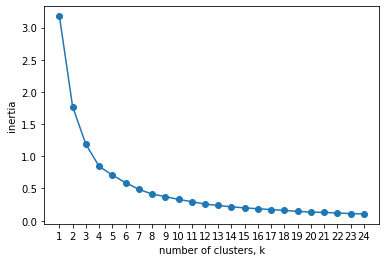

In [14]:
# use kmeans clustering in order to group the data by location. Essentially I want to break the data down even further
# by location. This will give a locational aspect for my linear regression model to work off. Also it makes for nice
# visualization. The plot displayed is my number of clusters vs. inertia to help me figure out how many clusters to
# make. It is important to note that I am only using coordniates and not coordinates with price

from sklearn.cluster import KMeans # import KMeans
import matplotlib.pyplot as plt # import matplot lib under alias

ks = range(1, 25)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=9) # setting a random state ensures consistent results every time
    
    # Fit model to samples
    model.fit(coordinates)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs. inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [15]:
# next I choose my k value which I went with 12 to better represent the number of neighborhoods in Chicago. 4 would be
# an even better choice since it as at the elbow in my elbow plot
model = KMeans(n_clusters=12, random_state=9)
model.fit(coordinates)
# now the apartments are all represented by different numbers. Next we plot the coordinates to see what this looks like

KMeans(n_clusters=12, random_state=9)

In [16]:
# here we combine our coordinates with price data with our labels. I have shown the first 10 samples
combined_cluster = np.c_[coordinates_with_price,model.labels_]
print(combined_cluster[:11])
# column 1 represents latitude, 2 represents longitude, 3 represents price, 4 represents the cluster they belong to

[[ 4.18962e+01 -8.76685e+01  2.91000e+03  9.00000e+00]
 [ 4.19019e+01 -8.76779e+01  1.20000e+03  9.00000e+00]
 [ 4.19039e+01 -8.76346e+01  2.60000e+03  1.00000e+00]
 [ 4.19039e+01 -8.76346e+01  2.10000e+03  1.00000e+00]
 [ 4.18967e+01 -8.76270e+01  1.87300e+03  1.00000e+00]
 [ 4.18793e+01 -8.76471e+01  2.61000e+03  4.00000e+00]
 [ 4.18793e+01 -8.76471e+01  2.29800e+03  4.00000e+00]
 [ 4.18793e+01 -8.76471e+01  1.81900e+03  4.00000e+00]
 [ 4.19453e+01 -8.77474e+01  1.10000e+03  8.00000e+00]
 [ 4.19017e+01 -8.77249e+01  1.00000e+03  3.00000e+00]
 [ 4.19303e+01 -8.76396e+01  1.95000e+03  5.00000e+00]]


In [17]:
combined_cluster_df = pd.DataFrame(combined_cluster) # convert this data into a dataframe so it can be exported to CSV
combined_cluster_df.to_csv('../Datasets/combined_cluster.csv') # export the data into CSV format

In [18]:
# Plot the data for visualization
import folium # import folium

chicago_map = folium.Map(location=[41.8641,-87.6298],
                         tiles="CartoDB dark_matter",
                         zoom_start=11) # build the Chicago map

# include icon colors for our map
colors = ['red', 'orange', 'darkgreen', 'lightgreen',
          'green', 'blue', 'darkblue', 'purple',
          'darkred', 'pink', 'beige', 'lightgray']

# assign a color to each cluster
for x, y, price, value in combined_cluster:
    for index, color in enumerate(colors):
        if value == index:
            c = colors[index]
            
            # add the colored icons to our map
            folium.Marker(location=[x,y],
                          icon=folium.Icon(color=c,icon_color='white', icon='home'),
                          popup=price).add_to(chicago_map)

# view the map. Here we can see the locations of all the apartments. Click on the home icon and you will see the price
display(chicago_map )

## color to region key

- region 0 = red
- region 1 = orange
- region 2 = dark green
- region 3 = light green
- region 4 = green
- region 5 = blue
- region 6 = dark blue
- region 7 = purple
- region 8 = dark red
- region 9 = pink
- region 10 = beige
- region 11 = light gray

In [19]:
# Other data visualizations can be found in my Tableau Public account
print("https://public.tableau.com/profile/matthew.emanuel#!/vizhome/U_S_HousingPublication/U_S_HousingVisualization")

https://public.tableau.com/profile/matthew.emanuel#!/vizhome/U_S_HousingPublication/U_S_HousingVisualization


# Pre-Processing the Data

In [20]:
color_subset = combined_cluster[:, 3:4] # extract the cluster each data point belongs to
print(color_subset[:11]) # display the first 10 clusters

[[9.]
 [9.]
 [1.]
 [1.]
 [1.]
 [4.]
 [4.]
 [4.]
 [8.]
 [3.]
 [5.]]


In [21]:
chicago_home['region'] = color_subset.astype('str') # add the clusters to the dataframe as a string
chicago_home.sample(5) # disply 5 samples which now includes the region they bleong to

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,region
90285,2850.0,1100.0,2.0,2.0,1,1,1,0,0,0,w/d in unit,detached garage,41.9209,-87.7043,3.0
90665,1370.0,550.0,0.0,1.0,0,0,1,0,0,0,laundry in bldg,attached garage,41.9100,-87.6316,1.0
89797,1600.0,1000.0,2.0,1.0,0,1,1,0,0,0,w/d in unit,off-street parking,41.9058,-87.6971,3.0
90374,1875.0,800.0,2.0,1.0,1,1,1,0,0,0,w/d in unit,street parking,41.8426,-87.6306,4.0
89687,2000.0,750.0,1.0,1.0,0,0,0,0,0,0,laundry in bldg,attached garage,41.9127,-87.6336,1.0


In [22]:
chicago_home.to_csv('../Datasets/chicago_home_w_region.csv')

In [23]:
# the values for 2 of the discrete variables can be seen below
print(chicago_home['laundry_options'].value_counts(), '\n')
print(chicago_home['parking_options'].value_counts())

w/d in unit           318
laundry in bldg       316
unknown                35
laundry on site        32
no laundry on site     24
w/d hookups             4
Name: laundry_options, dtype: int64 

street parking        278
attached garage       161
off-street parking    110
detached garage        77
unknown                64
no parking             19
valet parking          10
carport                10
Name: parking_options, dtype: int64


In [24]:
# create dummy variables for our categorical features and drop latitude and longitude as location is now represented
# by the region variable created.

df_with_dummies = pd.get_dummies(chicago_home).drop(['lat', 'long'], axis=1)

display(df_with_dummies.sample(10)) # visualize the data below

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_unknown,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_unknown,parking_options_valet parking,region_0.0,region_1.0,region_10.0,region_11.0,region_2.0,region_3.0,region_4.0,region_5.0,region_6.0,region_7.0,region_8.0,region_9.0
90019,1375.0,500.0,0.0,1.0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
90316,3095.0,1900.0,4.0,2.0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
89712,1648.0,589.0,0.0,1.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
90110,1050.0,800.0,2.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
91073,2278.0,736.0,1.0,1.0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
91076,2234.0,819.0,1.0,1.0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
90228,2285.0,870.0,1.0,1.0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
90787,850.0,900.0,1.0,1.0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
90054,2500.0,1400.0,3.0,2.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
90643,1375.0,1200.0,2.0,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Modeling the Data

In [25]:
X = df_with_dummies.drop('price', axis=1).reset_index(drop=True) # extract the independent variables
y = df_with_dummies['price'].reset_index(drop=True) # extract the dependent variable

In [26]:
from sklearn.model_selection import train_test_split # import train_test_split

# Split the data and view the shapes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(583, 35)
(146, 35)
(583,)
(146,)


In [27]:
from sklearn.linear_model import LinearRegression # import LinearRegression

lr_model = LinearRegression() # instantiate the model

lr_model.fit(X_train, y_train) # fit the model

y_preds = lr_model.predict(X_test) # make predictions

# Evaluate the Model

In [28]:
print(lr_model.score(X_test, y_test)) # score the model to find the the R2 score

0.7325659654243513


In [29]:
zipped = zip(lr_model.coef_, X_train.columns) # combine the coefficients with the column data

df_importance = pd.DataFrame(zipped).sort_values(by=0, ascending=False) # sort by importance
df_importance.reset_index(inplace=True, drop=True) # reset the index

df_importance.columns = ['Importance', 'Feature'] # name the columns

display(df_importance) # view the results

,Importance,Feature
0,523.730497,region_1.0
1,344.009823,region_4.0
2,336.730296,baths
3,256.108813,laundry_options_w/d in unit
4,241.208618,region_5.0
5,230.480409,region_9.0
6,196.813688,comes_furnished
7,189.581492,parking_options_attached garage
8,179.577866,parking_options_valet parking
9,154.520287,wheelchair_access


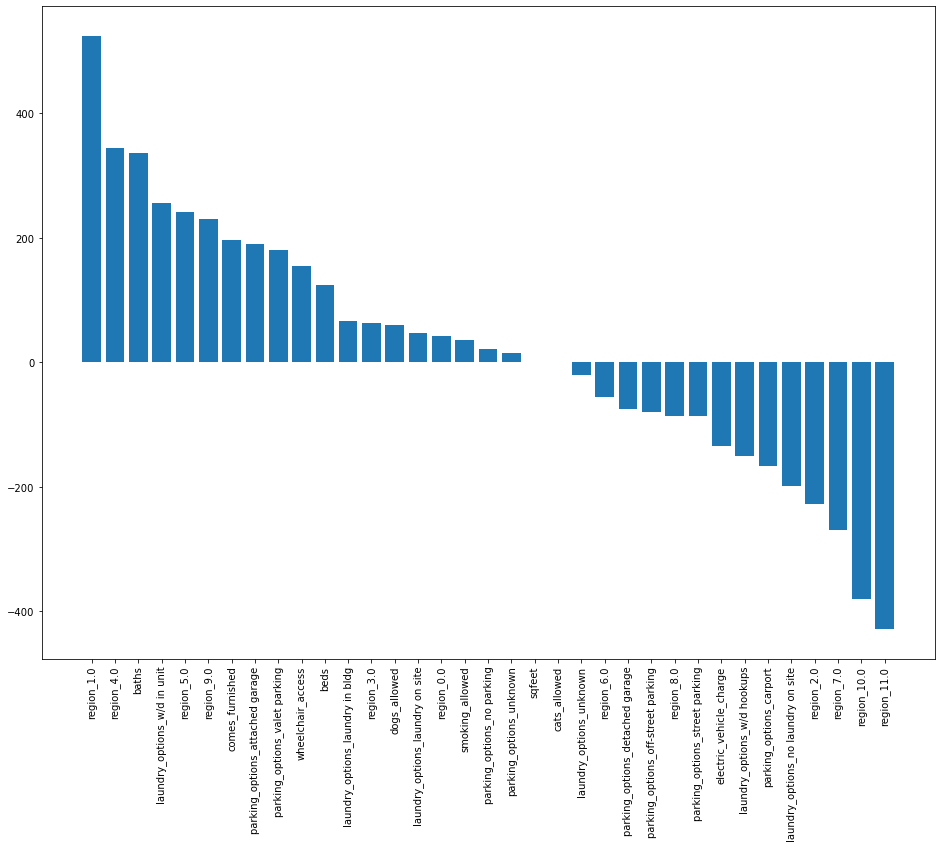

In [30]:
plt.figure(figsize=(16, 12))

plt.bar(x=df_importance['Feature'], height=df_importance['Importance'])
plt.xticks(rotation=90)
plt.show() # plot the results

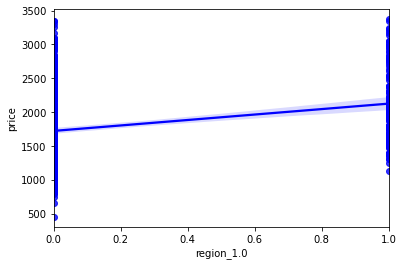

In [31]:
import seaborn as sns # import seaborn

# plot the slope of the most important feature in determining an increase in cost
sns.regplot(data=df_with_dummies,
            y='price',
            x='region_1.0',
            color='b')
plt.show()

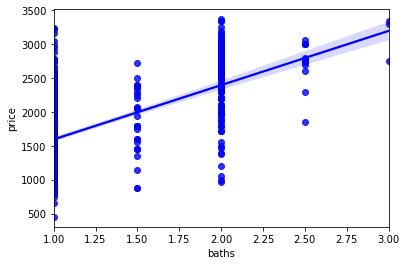

In [32]:
# plot the slope of the 2nd most important feature in determining an increase in cost
sns.regplot(data=df_with_dummies,
            y='price',
            x='baths',
            color='b')
plt.show()

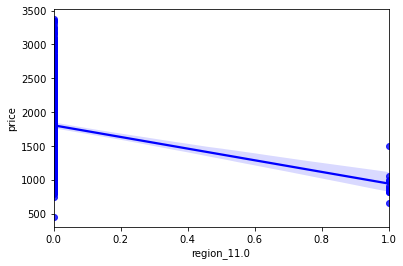

In [33]:
# plot the slope of the most important feature in determining a decrease in cost
sns.regplot(data=df_with_dummies,
            y='price',
            x='region_11.0',
            color='b')
plt.show()

In [34]:
# build a dataframe on 20 predictions
predictions_df = pd.DataFrame([y_preds[:21],
                              list(y_test[:21]),
                              (y_preds[:21] - list(y_test[:21]))]).T

# name columns
predictions_df.columns = ['Predictions', 'Actual Values', 'Difference']

# display results
display(predictions_df)

,Predictions,Actual Values,Difference
0,1027.955516,1025.0,2.955516
1,1190.370195,1075.0,115.370195
2,1994.602491,1679.0,315.602491
3,1564.821866,1500.0,64.821866
4,1901.200411,2750.0,-848.799589
5,914.698685,995.0,-80.301315
6,1904.540964,1800.0,104.540964
7,2295.548705,2500.0,-204.451295
8,1586.256212,1395.0,191.256212
9,1230.763937,1325.0,-94.236063


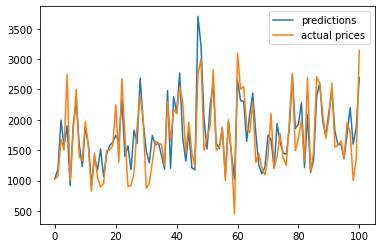

In [35]:
plt.plot(range(len(y_preds[:101])), y_preds[:101]) # plot 100 predictions
plt.plot(range(len(y_test[:101])), y_test[:101]) # plot 100 actual values

plt.legend(labels=['predictions', 'actual prices']) # provide a legend

plt.show() # show the results. How well the lines match is a visual indication of a better perfroming model

# Evaluating the Cost of the Apartment in Question

In [36]:
# at the begining of the article there was question some question to whether you are getting a good deal or not. Now
# let's use our model to make a prediction on how much the apartment should cost

In [37]:
# create an empy pandas dataframe we can add to
apartment_info = pd.DataFrame(data=[np.zeros(len(X_test.columns))], columns=X_test.columns)

# fill the dataframe.
apartment_info['sqfeet'] = 1250
apartment_info['beds'] = 2
apartment_info['baths'] = 1
apartment_info['cats_allowed'] = 1
apartment_info['dogs_allowed'] = 1
apartment_info['comes_furnished'] = 1
apartment_info['laundry_options_laundry in bldg'] = 1
apartment_info['parking_options_street parking'] = 1
apartment_info['region_9.0'] = 1

In [38]:
# the updated datframe.
display(apartment_info)

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_unknown,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_unknown,parking_options_valet parking,region_0.0,region_1.0,region_10.0,region_11.0,region_2.0,region_3.0,region_4.0,region_5.0,region_6.0,region_7.0,region_8.0,region_9.0
0,1250,2,1,1,1,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [39]:
print('The predicted cost of the apartment is: ${} per month'.format(round(lr_model.predict(apartment_info)[0])))

The predicted cost of the apartment is: $1935 per month


In [40]:
# it looks like you're getting an excellent price on the home compared to other apartments in Chicago